# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **

It's a binary classification problem. We are gonna predict a discrete outcome given the initial input. In particular we have to decide between two classes, "need" or "do not need" and intervention. As opposed to a continuous outcome like in the former project of predicting house prices.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [2]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1]

# TODO: Calculate passing students
n_passed = student_data[student_data.passed == 'yes'].shape[0]

# TODO: Calculate failing students
n_failed = student_data[student_data.passed == 'no'].shape[0]

# TODO: Calculate graduation rate
grad_rate = float(n_passed)/n_students

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 31
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 0.67%


In [3]:
#Consistency check:
if n_students==(n_passed + n_failed):
    print('Data is consistent!')

Data is consistent!


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [4]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [5]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import ShuffleSplit
def split_data(X, y, test_size):
    from sklearn.cross_validation import train_test_split
    return train_test_split(X, y, test_size=test_size, random_state = 42) 

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train
test_size = float(num_test)/y_all.shape[0]

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = split_data(X_all, y_all, test_size)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **


- Logistic Regression: The first one I chose was Log Reg because conceptualy, it is a very simple algorithm. Being easy to understand what it's doing, I thought it would be nice to use it here for comparisons with the other choices.
 - Wikipedia lists many applications, on in particular is used in medicine to calculate the so called Trauma and Injury Severity Score (TRISS) [1].
 - LG is very fast compared to other algorithms and very simple (easy interpretation).
 - Situations when it can perform poorly are when there are too many features and few examples (curse of dimensionality - CoD) and with categorical data, since this will create sparseness.
 - LG works well with a few (~10) samples for each class. Given that our dataset is not very large, I believe LG can be helpful. Due to its simplicity, it is also less prone to overfitting.

- Decision Trees: DTs are also simple algorithms, easy to follow. But they add some complexity to the model when compared to LG, so I thought it would be nice to test it along LG. Also widely used, for example of an application in Physics to classify different types of elementary particles: [2].
 - Fast, simple to understand and to interpret. Nice visual interpretation.
 - It is prone to overfit the data, it requires careful study of the hyper parameters. Also, it also suffers from the CoD and requires a good ratio of samples to features.
 - Given the nature of the data, where it is likely that there is no true underlying model but only correlations among the different features, DTs perform well in these types of analysis with careful check of its parameters.
 
- Adaboost: Given that I decided to use DTs, I thought that boosting would be a natural pedagogical choice to compare with DTs. Since Adaboost can use DTs as its weak leaner, it is nice to see if an emsemble of trees can do a better job . Application: the Viola-Jones face detector [3]. As the document on boosting provided describes, adaboost:
 - is computationally efficient, there are no difficult parameters to set and it is versatile.
 - is susceptible to uniform noise and requires enough data for the weak learner to perform better than random guessing.
 - Since one can expect DTs to work well in this problem, this makes boosting a natural candidate.

[1]: Boyd, C. R.; Tolson, M. A.; Copes, W. S. (1987). "Evaluating trauma care: The TRISS method. Trauma Score and the Injury Severity Score". The Journal of trauma. 27 (4): 370–378. doi:10.1097/00005373-198704000-00005. PMID 3106646.

[2]: DAVID BOWSER-CHAO AND DEBRA L. DZIALO. Comparison of the use of binary decision trees and neural networks in top quark detection. Physical Review D: Particles and Fields, 47(5):1900, March 1993.

[3]: Chris McCormick - Adaboost tutorial: http://mccormickml.com/2013/12/13/adaboost-tutorial/

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [7]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [8]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the three models
random_seed = 42
clf_A = LogisticRegression(random_state=random_seed)
clf_B = tree.DecisionTreeClassifier(random_state=random_seed)
clf_C = AdaBoostClassifier(random_state=random_seed)

clf_list = [clf_A, clf_B, clf_C]
sizes = [100,200,300]

# TODO: Set up the training set sizes
"""
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]
"""

# TODO: Execute the 'train_predict' function for each classifier and each training set size
train_gen = (train_predict(clf, X_train[:size], y_train[:size], X_test, y_test) for clf in clf_list for size in sizes)

for _ in train_gen:
    print 

Training a LogisticRegression using a training set size of 100. . .
Trained model in 0.0294 seconds
Made predictions in 0.0012 seconds.
F1 score for training set: 0.8593.
Made predictions in 0.0003 seconds.
F1 score for test set: 0.7647.

Training a LogisticRegression using a training set size of 200. . .
Trained model in 0.0021 seconds
Made predictions in 0.0004 seconds.
F1 score for training set: 0.8562.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.7914.

Training a LogisticRegression using a training set size of 300. . .
Trained model in 0.0026 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 0.8468.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.8060.

Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0009 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.6552.

Training a DecisionTreeClassifier using 

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

Note that the folowing values might be different from the above, since I wrote them down once but ran the code again several times before submiting. But the scores should be the same since I am using the same seed.

** Classifer 1 - Logistic Regression**  

| Training Set Size | Training Time in ms | Prediction Time in ms (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        1.4              |          0.2           |      0.8593      |     0.7647     |
| 200               |        2.0              |          0.2           |      0.8562      |      0.7914      |
| 300               |        3.5              |          0.3           |      0.8468          |    0.8060      |

** Classifer 2 - Decision Tree**  

| Training Set Size | Training Time in ms | Prediction Time in ms (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |         0.9             |       0.2                 |     1.0000     |      0.6441           |
| 200               |         1.3             |       0.3                 |      1.0000    |       0.7385          |
| 300               |         2.6                |       0.4               |    1.0000    |     0.6457     |

** Classifer 3 - AdaBoostClassifier **

| Training Set Size | Training Time in ms| Prediction Time in ms (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |          146.0             |       6.3                 |       0.9481   |    0.7669      |
| 200               |           163.2              |        6.4                |    0.8927         |     0.8281 |
| 300               |         133.9                |          6.8           |     0.8637       |      0.7820     |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **

Given the size of our data set, I believe Logistic Regression is more subtable for this analysis. It's true that the parameters of Decision Trees and Adaboost need to be changed to really judge their performances. Both of these algorithms are more sensible to different parameter sets compared to Log Reg.

But Log Reg seems to be more robust when using different training sizes. It is faster than Adaboost, but I would not use this as a decising factor since in this particular application, speed is not really an issue. We are doing an offline study and all time scales in this problem are really small for our purposes.

Another advantage of using Log Reg is that even if Adaboost's performance increases after parameter tunning, it might not be better enough to justify using a complicated model. If both scores are relatively similar, I would go with the simpler model.

In [9]:
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as rec

p = prec(y_test, clf_A.predict(X_test), pos_label='yes')
r = rec(y_test, clf_A.predict(X_test), pos_label='yes' )
print('Precision of: {}'.format(p))
print('Recall of: {}'.format(r))

print 2*p*r/(p+r)

Precision of: 0.72972972973
Recall of: 0.9
0.805970149254


### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **

We've decided to do the analysis using a technique called Logistic Regression. We've separated the data into 2 groups, one we use to train the algorithm so that it can learn from the data we have and the other group we use to make sure it is working properly. 

The way it works is: it will look at all the characteristics for each student and try to find relations among these features that can tell if a student is more likely to suceed or not. So we feed to the algorithm the first set of data for it to train and find all these relations. And then we get back from it these relations and use them to predict if a student in the other group of data is more likely to pass or not.

Since we have the answer for all the students we can see how well we are doing and the algorithm is doing pretty well. Out of the students that passed the exam we were able to correctly predict that they would pass 90% of the time!

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [10]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from  sklearn.grid_search import GridSearchCV 
from sklearn.metrics import make_scorer,accuracy_score,fbeta_score

# TODO: Create the parameters list you wish to tune
parameters = {'C': np.arange(0.1,1.1,0.1)}

# TODO: Initialize the classifier
clf = LogisticRegression(random_state=random_seed)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, param_grid=parameters,scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Made predictions in 0.0004 seconds.
Tuned model has a training F1 score of 0.8304.
Made predictions in 0.0002 seconds.
Tuned model has a testing F1 score of 0.7857.


In [11]:
for i in xrange(10):
    print grid_obj.grid_scores_[i].cv_validation_scores

[ 0.82278481  0.81578947  0.81578947]
[ 0.81290323  0.79194631  0.8       ]
[ 0.82352941  0.78378378  0.8       ]
[ 0.82352941  0.7755102   0.7972973 ]
[ 0.81578947  0.78082192  0.7972973 ]
[ 0.81578947  0.7862069   0.78911565]
[ 0.81578947  0.79166667  0.78911565]
[ 0.81578947  0.78014184  0.79452055]
[ 0.81578947  0.78014184  0.79452055]
[ 0.81578947  0.78014184  0.79452055]


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

Our final scores are:
- 83% for Training 
- 79% for Testing

These values actually lower than the some values in the untuned table. I believe this difference is coming from the fact that the grid search is doing a 3-fold CV in the background. While the untuned model ran only once. The tuned model chose C = 0.1 in contrast with C = 1.0 as the default parameter.
Looking at the cv scores individually we can see that indeed C = 0.1 does a better job at each fold and is more robust throughout the whole thing.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

# Some Questions

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import seaborn as sns

I wanted to look at the distribution of features in the two groups 'pass' or not like this:

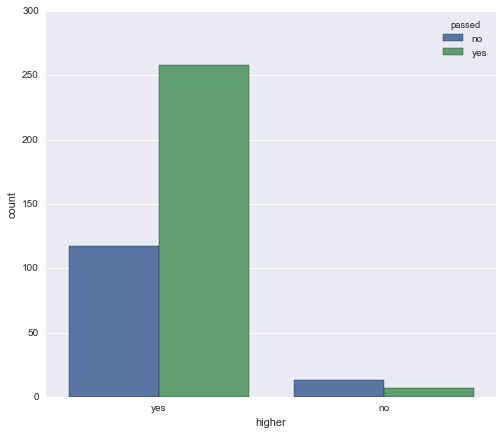

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,6))
fig.tight_layout()
sns.countplot(x='higher', hue='passed', data=student_data)
plt.show()

But in most features, there are 2 or more categories but the number of students in different categories is very different. For example, in the plot above, we can see there are many more students in the 'yes' group than 'no' for higher education. So for visualisation purposes it would be nice if the plot was normalized. Such that adding green and purple for the 'yes' group would give back 1 and the same for the 'no' group.

Question: Is there a nice way to do that?! Thanks a lot!